# 1) Load and Preprocess the Data:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
data.shape

(1014, 7)

In [5]:
data.isnull().sum().sum()

0

## There is no null value in this dataet

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

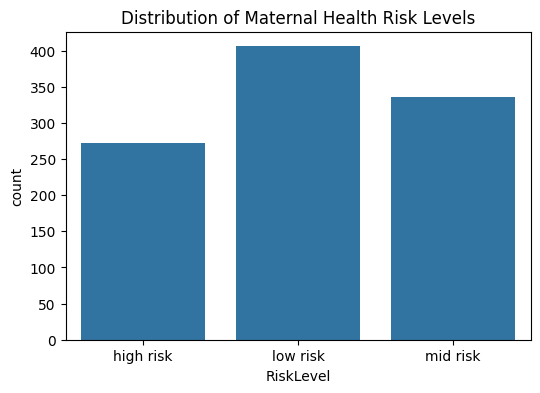

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x="RiskLevel", data=data)
plt.title("Distribution of Maternal Health Risk Levels")
plt.show()

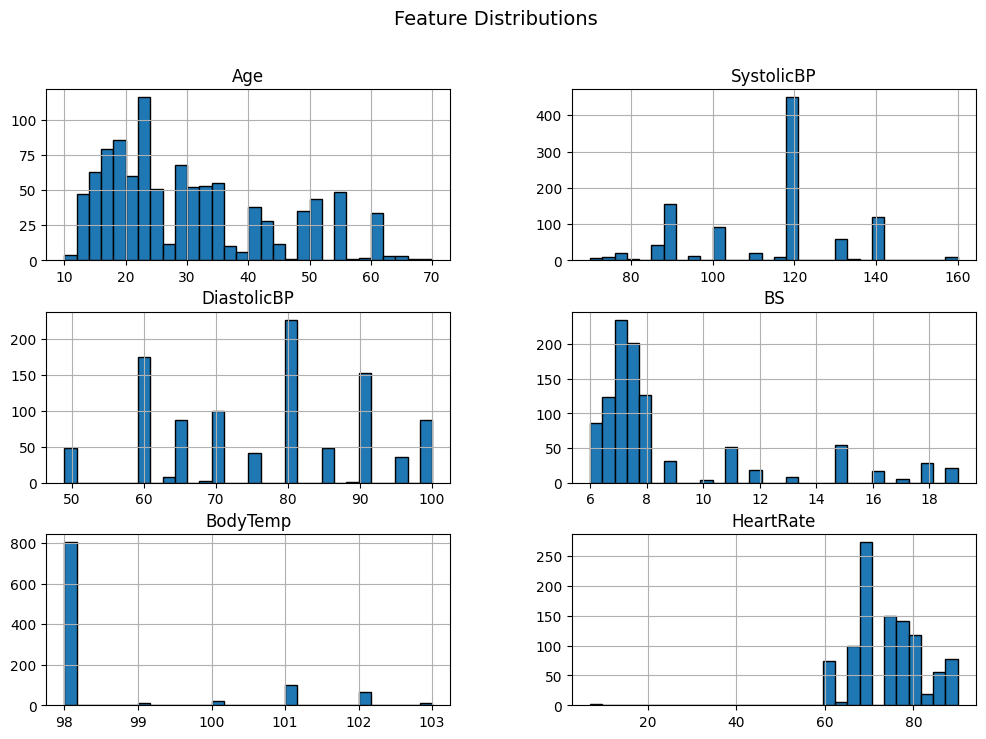

In [11]:
data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

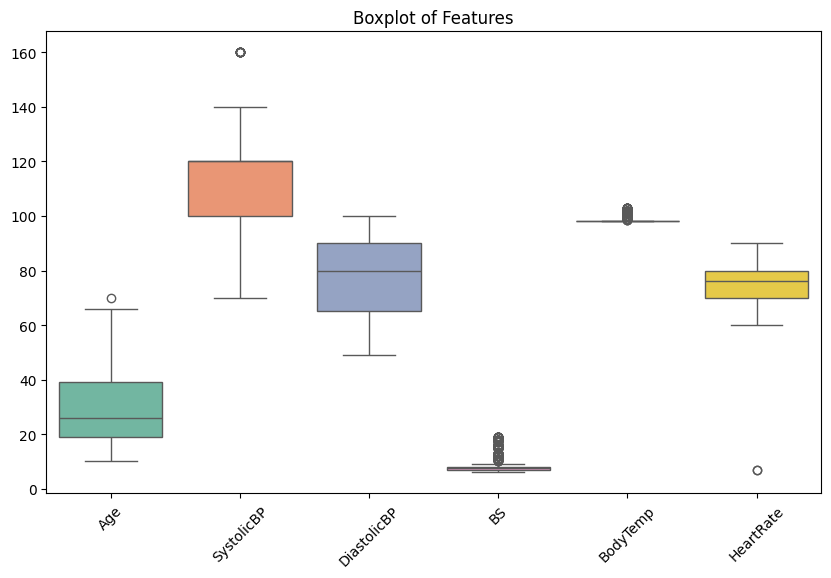

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

## Label Encoding the target column

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder=LabelEncoder()

In [15]:
data['RiskLevel']= label_encoder.fit_transform(data['RiskLevel'])

In [16]:
label_encoder = LabelEncoder()

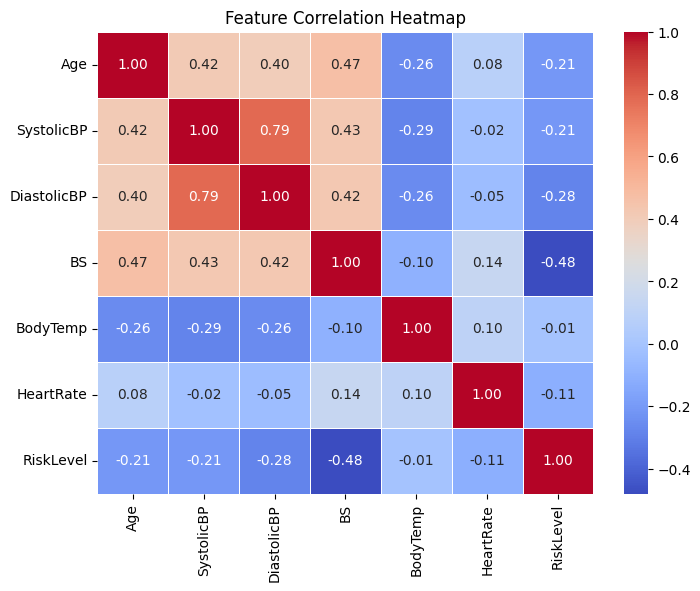

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
from scipy.stats import skew

skewness = data.skew()
print("Feature Skewness:\n", skewness)

Feature Skewness:
 Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
RiskLevel     -0.108748
dtype: float64


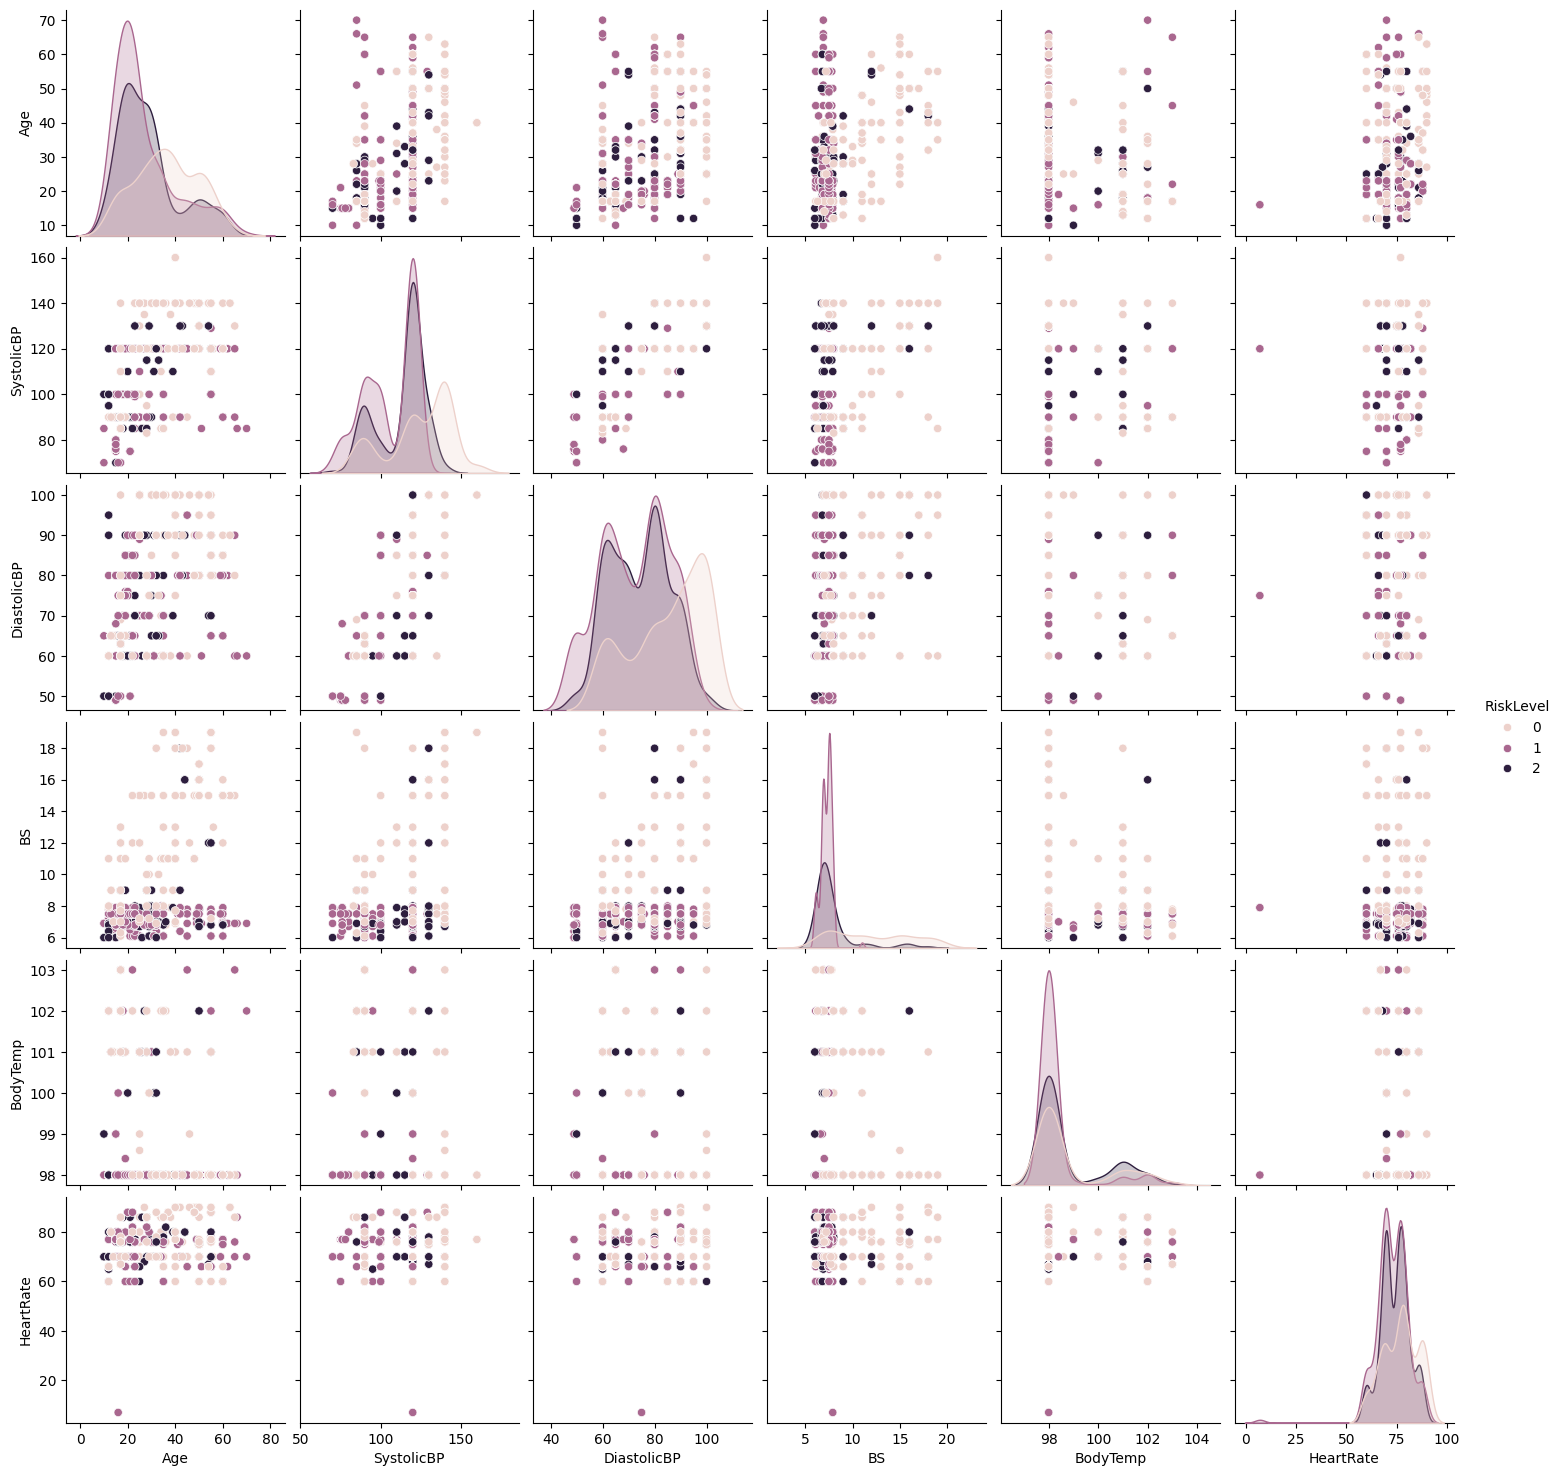

In [19]:
sns.pairplot(data, hue="RiskLevel")
plt.show()



### Split the dataset

In [20]:
X = data.iloc[:, :-1]  

In [21]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [22]:
y = data.iloc[:, -1]   


In [23]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

In [24]:
y.unique()

array([0, 1, 2])

In [25]:
y.nunique()

3

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()  


In [28]:
X = scaler.fit_transform(X)

## Label Encoding the target column

In [29]:
y = data['RiskLevel']

In [30]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

## Split dataset: 80% training, 20% testing

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

# 2) Bagging Implementation:

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model1 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

In [37]:
model1.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [38]:
test_predictions = model1.predict(X_test)

In [39]:
test_predictions

array([2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2,
       0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0,
       1, 2, 2, 2, 0])

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [42]:
accuracy1=accuracy_score(y_test, test_predictions)
accuracy1

0.8078817733990148

In [43]:
precision1=precision_score(y_test, test_predictions, average='weighted')
precision1

0.814527289486854

In [44]:
recall1=recall_score(y_test, test_predictions, average='weighted') 
recall1

0.8078817733990148

In [45]:
f11=f1_score(y_test, test_predictions, average='weighted')
f11

0.8084290104530727

## Show accuracy matrix as a Dataframe

In [46]:
accuracy_matrix = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy1, precision1, recall1, f11]
})


In [47]:
accuracy_matrix

,Metric,Score
0,Accuracy,0.807882
1,Precision,0.814527
2,Recall,0.807882
3,F1-Score,0.808429


## Compute confusion matrix

In [48]:

conf_matrix1 = confusion_matrix(y_test, test_predictions)

In [49]:
conf_matrix1

array([[40,  1,  6],
       [ 3, 60, 17],
       [ 3,  9, 64]])

## Plot confusion matrix

In [50]:
import seaborn as sns

In [51]:
import matplotlib.pyplot as plt

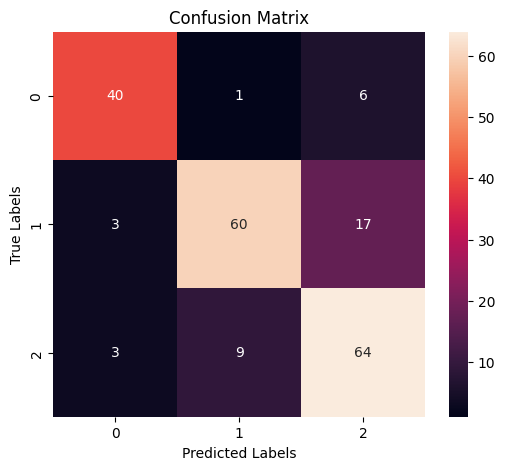

In [52]:

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix1, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# 3) Boosting Implementation:

In [53]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [54]:
from xgboost import XGBClassifier

In [55]:
model2=AdaBoostClassifier(n_estimators=50, random_state=42)

In [56]:
model3= GradientBoostingClassifier(n_estimators=50, random_state=42)

In [57]:
model4=XGBClassifier(n_estimators=50, eval_metric='mlogloss', random_state=42)

In [58]:
model2.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [59]:
model3.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [60]:
model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# AdaBoostClassifier Evaluation

In [61]:
test_predictions = model2.predict(X_test)
test_predictions

array([2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 2, 2])

In [62]:
accuracy2=accuracy_score(y_test, test_predictions)
accuracy2

0.6945812807881774

In [63]:
precision2=precision_score(y_test, test_predictions, average='weighted')
precision2

0.7036267138434321

In [64]:
recall2=recall_score(y_test, test_predictions, average='weighted') 
recall2

0.6945812807881774

In [65]:
f12=f1_score(y_test, test_predictions, average='weighted')
f12

0.69643113617261

## Show accuracy matrix as a Dataframe

In [66]:
accuracy_matrix = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy2, precision2, recall2, f12]
})


In [67]:
accuracy_matrix

,Metric,Score
0,Accuracy,0.694581
1,Precision,0.703627
2,Recall,0.694581
3,F1-Score,0.696431


## Compute confusion matrix¶

In [68]:
conf_matrix = confusion_matrix(y_test, test_predictions)

In [69]:
conf_matrix

array([[31,  3, 13],
       [ 2, 58, 20],
       [ 5, 19, 52]])

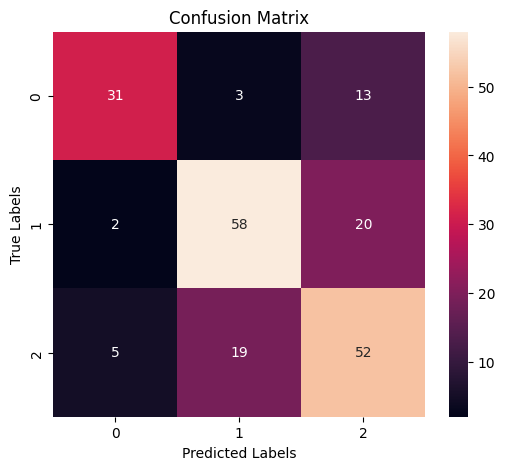

In [70]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# GradientBoostingClassifier Evaluation

In [71]:
test_predictions = model3.predict(X_test)
test_predictions

array([2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 2, 0])

In [72]:
accuracy3=accuracy_score(y_test, test_predictions)
accuracy3

0.7487684729064039

In [73]:
precision3=precision_score(y_test, test_predictions, average='weighted')
precision3

0.7495390214602038

In [74]:
recall3=recall_score(y_test, test_predictions, average='weighted') 
recall3

0.7487684729064039

In [75]:
f13=f1_score(y_test, test_predictions, average='weighted')
f13

0.7479471055637963

## Show accuracy matrix as a Dataframe

In [76]:
accuracy_matrix = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy3, precision3, recall3, f13]
})


In [77]:
accuracy_matrix

,Metric,Score
0,Accuracy,0.748768
1,Precision,0.749539
2,Recall,0.748768
3,F1-Score,0.747947


## Compute confusion matrix¶

In [78]:
conf_matrix = confusion_matrix(y_test, test_predictions)

In [79]:
conf_matrix

array([[38,  4,  5],
       [ 1, 64, 15],
       [ 6, 20, 50]])

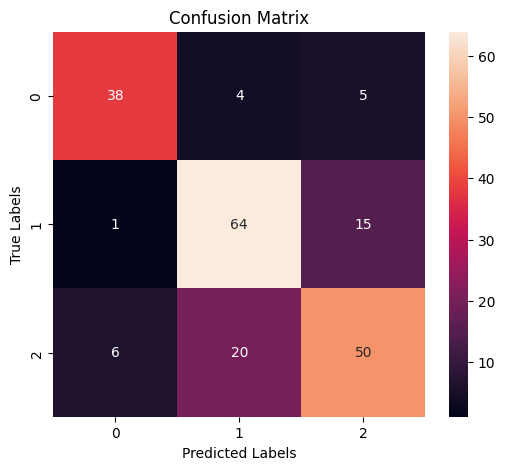

In [80]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# XGBClassifier Evaluation 

In [81]:
test_predictions = model4.predict(X_test)
test_predictions

array([2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 2,
       0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0,
       1, 2, 2, 2, 0])

In [82]:
accuracy4=accuracy_score(y_test, test_predictions)
accuracy4

0.8423645320197044

In [83]:
precision4=precision_score(y_test, test_predictions, average='weighted')
precision4

0.8427400801169274

In [84]:
recall4=recall_score(y_test, test_predictions, average='weighted') 
recall4

0.8423645320197044

In [85]:
f14=f1_score(y_test, test_predictions, average='weighted')
f14

0.8423566439324042

## Show accuracy matrix as a Dataframe

In [86]:
accuracy_matrix4 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy4, precision4, recall4, f14]
})


In [87]:
accuracy_matrix4

,Metric,Score
0,Accuracy,0.842365
1,Precision,0.842740
2,Recall,0.842365
3,F1-Score,0.842357


## Compute confusion matrix

In [88]:
conf_matrix4 = confusion_matrix(y_test, test_predictions)
conf_matrix4

array([[41,  2,  4],
       [ 4, 66, 10],
       [ 3,  9, 64]])

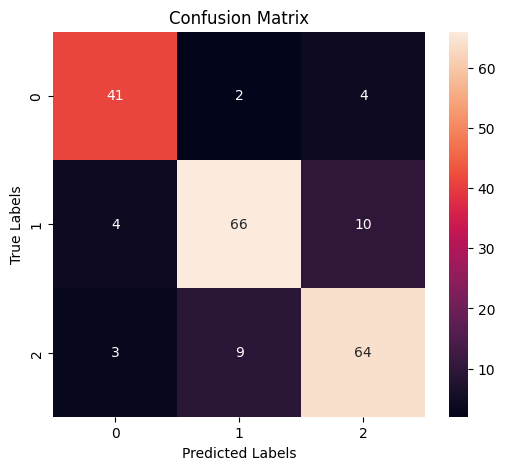

In [89]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix4, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Choose base models among AdaBoostClassifier GradientBoostingClassifier and XGBClassifier

In [90]:
models = {
    'Bagging':model1,
    'AdaBoost': model2,
    'GradientBoosting': model3,
    'XGBoost': model4
    
}

In [91]:
test_accuracies = {}

In [92]:
for name, model in models.items():
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracies[name] = accuracy_score(y_test, test_predictions)

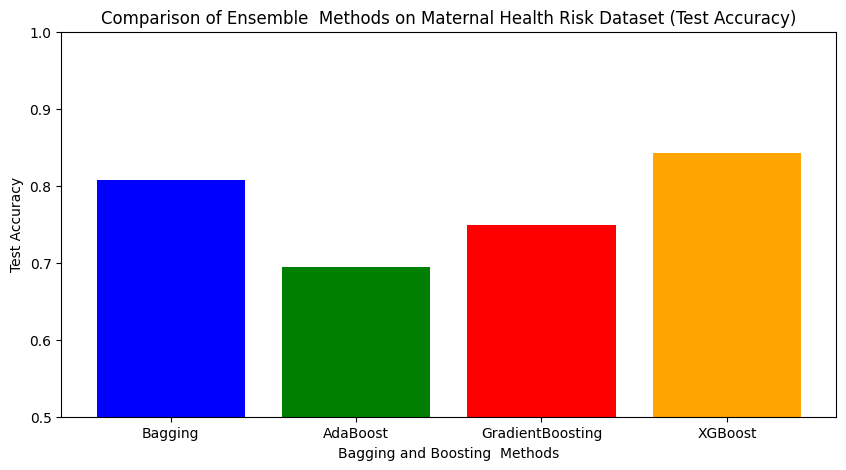

In [93]:
plt.figure(figsize=(10, 5))
plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['blue', 'green', 'red','orange'])
plt.xlabel('Bagging and Boosting  Methods')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Ensemble  Methods on Maternal Health Risk Dataset (Test Accuracy)')
plt.ylim([0.5, 1.0])  # Adjusted for dataset accuracy range
plt.show()

In [94]:
best_model_name = max(test_accuracies, key=test_accuracies.get)

In [95]:
best_model_name

'XGBoost'

In [96]:
print("\nTest Accuracy:")
for model, acc in test_accuracies.items():
    print(f"{model}: {acc:.4f}")


Test Accuracy:
Bagging: 0.8079
AdaBoost: 0.6946
GradientBoosting: 0.7488
XGBoost: 0.8424


In [97]:
print(f"\n✅ Best Model: **{best_model_name}**")


✅ Best Model: **XGBoost**


In [98]:
best_model = models[best_model_name]

In [99]:
best_model.fit(X_train, y_train)
best_test_predictions = best_model.predict(X_test)

In [100]:
best_test_accuracy = accuracy_score(y_test, best_test_predictions)

In [101]:
print(f"🎯 Best Model Test Accuracy: {best_test_accuracy:.4f}")

🎯 Best Model Test Accuracy: 0.8424


# 4) Stacking Implementation:

In [102]:
from sklearn.ensemble import  StackingClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier


In [104]:
from sklearn.svm import SVC


In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
model5=StackingClassifier(
        estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression())],
        final_estimator=LogisticRegression()
    )

In [107]:
 model5.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True)),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [108]:
test_predictions = model5.predict(X_test)
test_predictions

array([2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0,
       1, 2, 2, 2, 0])

In [109]:
accuracy5=accuracy_score(y_test, test_predictions)
accuracy5

0.8226600985221675

In [110]:
precision5=precision_score(y_test, test_predictions, average='weighted')
precision5

0.8252832151323424

In [111]:
recall5=recall_score(y_test, test_predictions, average='weighted') 
recall5

0.8226600985221675

In [112]:
f15=f1_score(y_test, test_predictions, average='weighted')
f15

0.8225547363607623

# Show accuracy matrix as a Dataframe


In [113]:
accuracy_matrix = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy5, precision5, recall5, f15]
})

In [114]:
accuracy_matrix

,Metric,Score
0,Accuracy,0.822660
1,Precision,0.825283
2,Recall,0.822660
3,F1-Score,0.822555


# Compute confusion matrix

In [115]:
conf_matrix5 = confusion_matrix(y_test, test_predictions)
conf_matrix5

array([[41,  1,  5],
       [ 5, 62, 13],
       [ 3,  9, 64]])

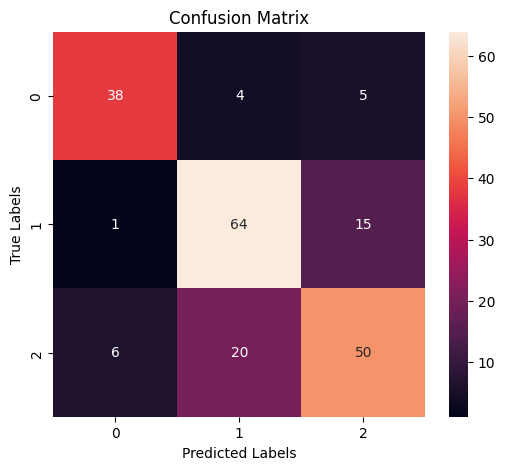

In [116]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 5) Compare the performance of Bagging, Boosting, and Stacking

In [117]:
performance={'Models':['Bagging','Boosting(XGB (best))','Stacking'],
              'Accuracy':[accuracy1,accuracy4,accuracy5],
               'Precision':[precision1,precision4,precision5],
              'Recall':[recall1,recall4,recall5],
              'F1-Score':[f11,f14,f15]
              
              
              }

In [118]:
pd.DataFrame(performance)

,Models,Accuracy,Precision,Recall,F1-Score
0,Bagging,0.807882,0.814527,0.807882,0.808429
1,Boosting(XGB (best)),0.842365,0.842740,0.842365,0.842357
2,Stacking,0.822660,0.825283,0.822660,0.822555


In [119]:
performance = {
    'Models': ['Bagging', 'Boosting (XGB Best)', 'Stacking'],
    'Accuracy': [accuracy1, accuracy4, accuracy5]  # Only accuracy values
}

In [120]:
models = performance['Models']
accuracy_values = performance['Accuracy']

In [121]:
import numpy as np

In [122]:
x = np.arange(len(models))  
width = 0.5

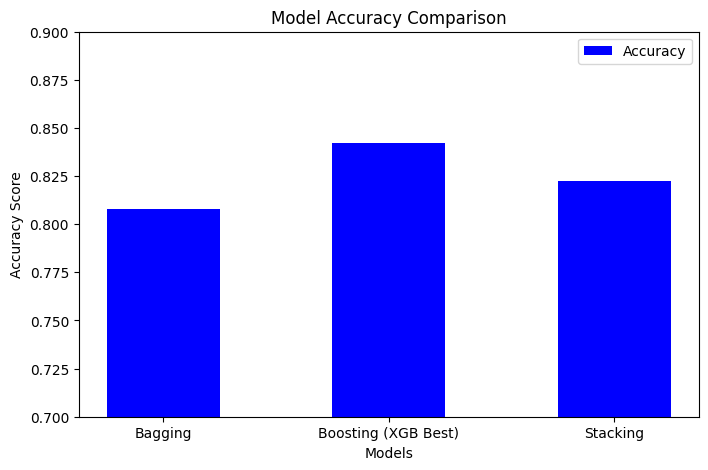

In [123]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, accuracy_values, width, color='blue', label='Accuracy')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0.7, 0.9)  
plt.show()


In [124]:
model_names = ['Bagging', 'Boosting (XGB Best)', 'Stacking']


In [125]:
conf_matrices = [conf_matrix1, conf_matrix4, conf_matrix5]

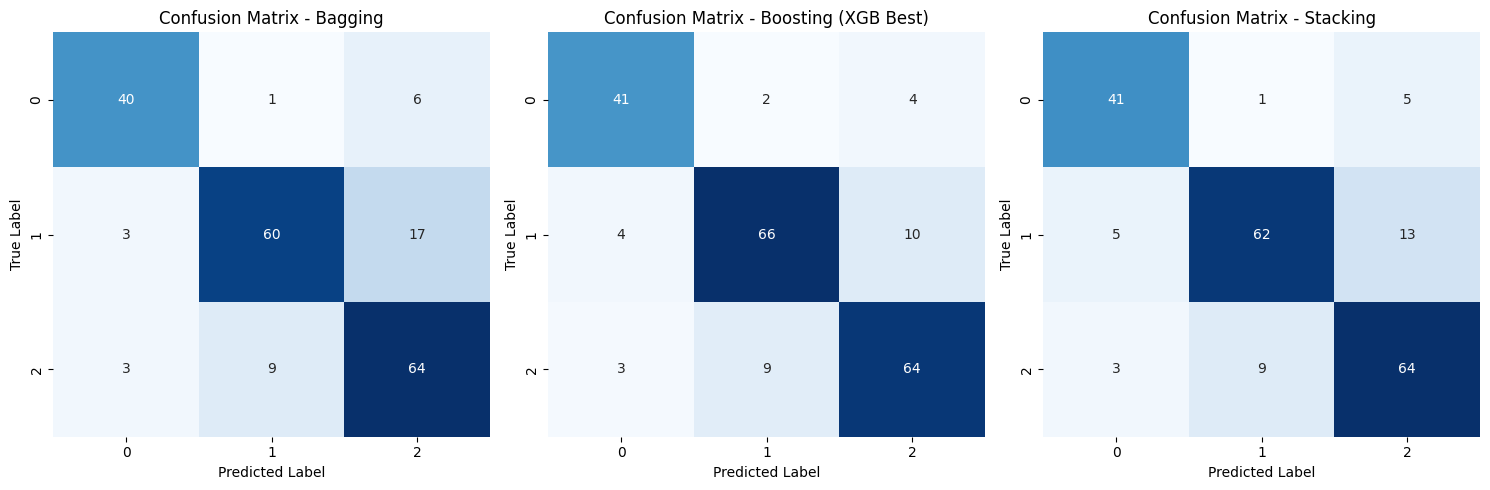

In [126]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_names[i]}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()

plt.show()


# 6) Select the Model (XGB Classifier) Analysis

In [127]:
accuracy_matrix4 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [accuracy4, precision4, recall4, f14]
})

In [128]:
pd.DataFrame(accuracy_matrix4)

,Metric,Score
0,Accuracy,0.842365
1,Precision,0.842740
2,Recall,0.842365
3,F1-Score,0.842357


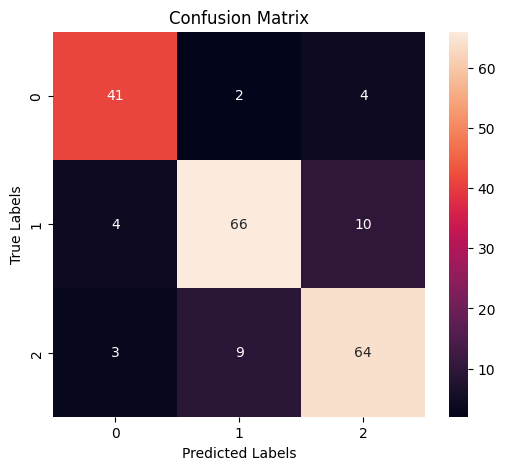

In [129]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix4, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# XGB Classifier (Best)  with Validation

In [130]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [131]:
final_model=XGBClassifier(n_estimators=50, eval_metric='mlogloss', random_state=42)

In [132]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [133]:
val_predictions = final_model.predict(X_val)
test_predictions = final_model.predict(X_test)

In [134]:
accuracy_score(y_test, test_predictions)

0.8529411764705882

In [135]:
conf_matrix = confusion_matrix(y_test, test_predictions)
conf_matrix

array([[23,  0,  3],
       [ 3, 32,  3],
       [ 1,  5, 32]])

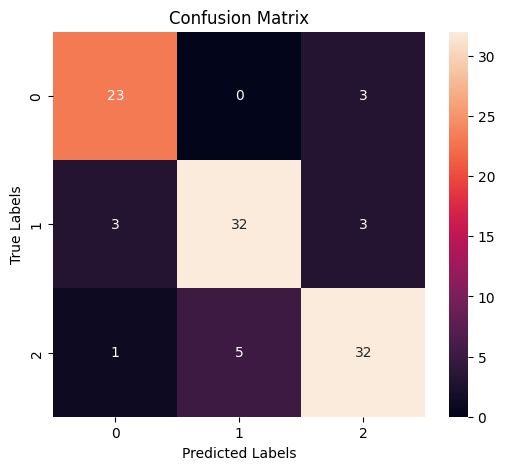

In [136]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [137]:
final_evaluation={'XGB':[accuracy4],
           'XGB(Validation)':[accuracy_score(y_test, test_predictions)]}

In [138]:
final_evaluation

{'XGB': [0.8423645320197044], 'XGB(Validation)': [0.8529411764705882]}

In [139]:
final_evaluation = {
    'XGB': [0.8423645320197044], 
    'XGB(With Validation)': [0.8529411764705882]
}

In [140]:
models = list(final_evaluation.keys())  
accuracies = [val[0] for val in final_evaluation.values()]

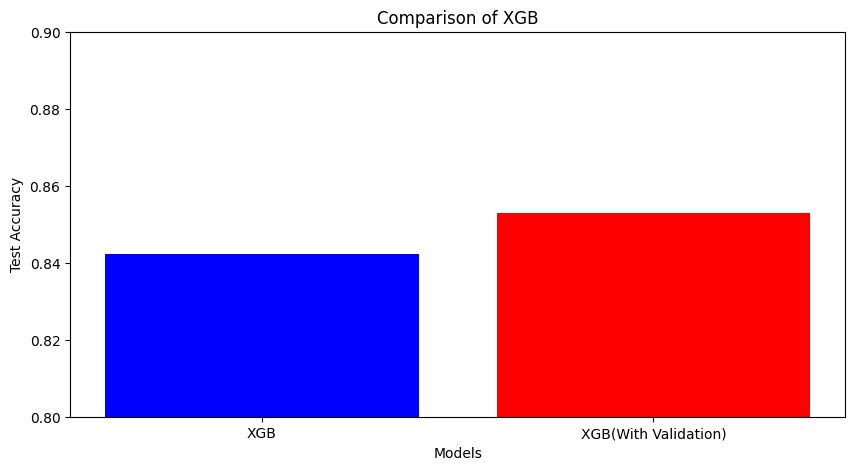

In [141]:
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'red'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of XGB')
plt.ylim([0.8, 0.9])  
plt.show()

In [142]:
pd.DataFrame(final_evaluation )

,XGB,XGB(With Validation)
0,0.842365,0.852941


In [143]:
model_names = ['XGB', 'XGB (Validation)']

In [144]:
conf_matrices = [conf_matrix4, conf_matrix]

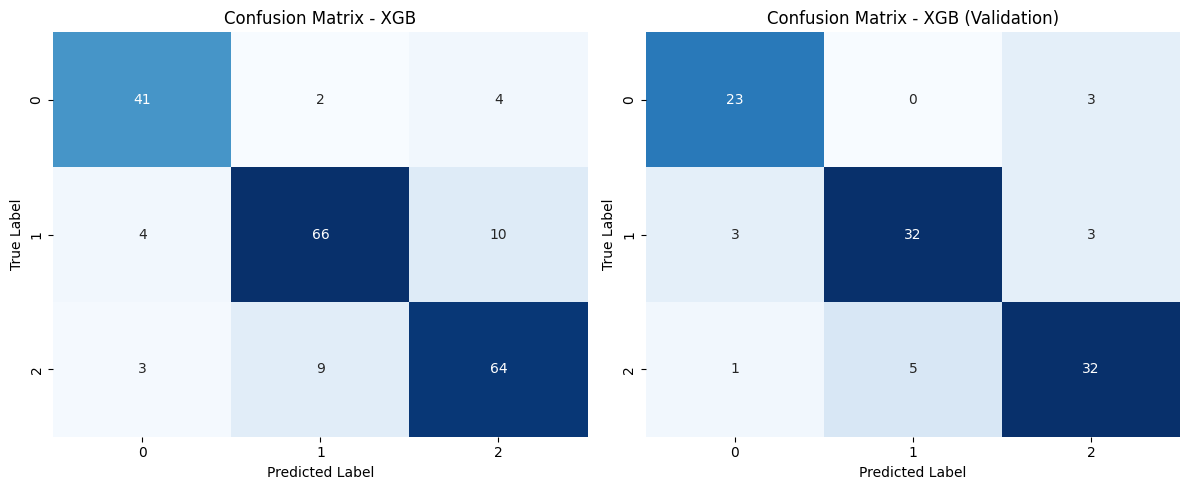

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, ax in enumerate(axes):
    sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_names[i]}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()

plt.show()

# End of Assignment